In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
#Grabbing Data
fdata = np.genfromtxt("Cloud_Collapse_dt7.csv", dtype="str", delimiter=",", skip_footer=1)

#Converting to 3D array
nd = []
energy = []
for i in range(len(fdata)):
    temp = []
    for j in range(len(fdata[0])-1):
        temp.append(np.array(fdata[i][j].split(' ')).astype(float))
    energy.append(np.array(fdata[i][-1].split(' ')).astype(float))  
    nd.append(temp)
energy = np.array(energy).T
fdata = np.array(nd)

print("Number of timesteps:  {}".format(fdata.shape[0]))
print("Number of particles:  {}".format(fdata.shape[1]))
#only contains positional data, no velocities are saved by default
print("Number of dimensions: {}\n".format(fdata.shape[2]))

#Comparing Different Timesteps
dts = [5,7,8,9]
ldata = []
for i in range(len(dts)):
    string = "Cloud_Collapse_dt" + str(dts[i]) + ".csv"
    temp = np.genfromtxt(string, dtype="float", delimiter=",", usecols=[0,1,2,3,4,5])
    ldata.append(temp[-1])
ldata = np.array(ldata).T
for i in range(1): #i in range(len(dts)):
    print("Timestep: dt = 2 ^ -{}".format(dts[i])) #value stored in ldata[2,i]
    print('Initial Energy: {:.4f}'.format(ldata[0,i]))
    print('Final Energy:   {:.4f}'.format(ldata[1,i]))
    print('Total number of steps integrated: {:.2e}'.format(ldata[3,i]))
    print('Softening Parameter epsilon^2: {:.2e}'.format(ldata[4,i]))
    print('Total Time integrated: {:.2f}\n'.format(ldata[5,i]))

Number of timesteps:  1280
Number of particles:  1024
Number of dimensions: 3

Timestep: dt = 2 ^ -5
Initial Energy: -0.5352
Final Energy:   -0.5252
Total number of steps integrated: 3.20e+02
Softening Parameter epsilon^2: 9.77e-04
Total Time integrated: 10.00



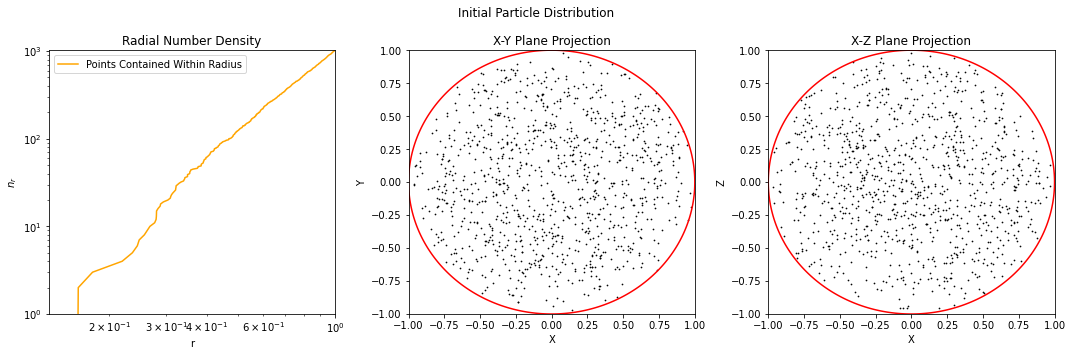

In [62]:
#Plotting Initial Conditions
r = np.sqrt(((fdata[0,:,:3]**2)).sum(axis=1))
r = r[r.argsort()]
# x = np.linspace(0,1,len(r));
nr = []
for val in r:
    nr.append( (r < val).sum() )
    
fig, ax = plt.subplots(1, 3, figsize=(15,5))

fig.suptitle('Initial Particle Distribution')

ax[0].plot(r,nr,color='orange',label='Points Contained Within Radius')
ax[0].set_title('Radial Number Density')
ax[0].set_yscale('log')
ax[0].set_xlabel('r')
ax[0].set_ylabel('$n_r$')
ax[0].set_xscale('log')
ax[0].set_xlim(0.13,1)
ax[0].set_ylim(1,len(r))
ax[0].legend()


ax[1].set_title('X-Y Plane Projection')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].scatter(fdata[0,:,0],fdata[0,:,1],s=0.5, color='black');

ax[2].set_title('X-Z Plane Projection')
ax[2].set_xlabel('X')
ax[2].set_ylabel('Z')
ax[2].scatter(fdata[0,:,0],fdata[0,:,2],s=0.5, color='black');

#Drawing circle on 2nd plot
cx = np.linspace(-1, 1, 400)
cy = np.linspace(-1, 1, 400)
cx, cy = np.meshgrid(cx, cy)
ax[1].contour(cx, cy,(cx**2 + cy**2), [1], colors='red');
ax[2].contour(cx, cy,(cx**2 + cy**2), [1], colors='red');
fig.tight_layout();

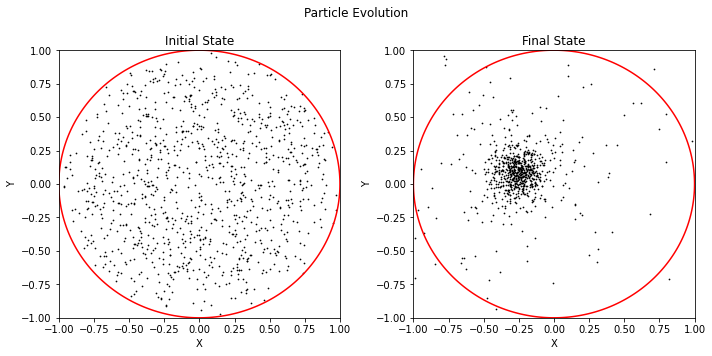

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

fig.suptitle('Particle Evolution')

#Drawing circle on plots
cx = np.linspace(-1, 1, 400)
cy = np.linspace(-1, 1, 400)
cx, cy = np.meshgrid(cx, cy)
ax[0].contour(cx, cy,(cx**2 + cy**2), [1], colors='red');
ax[1].contour(cx, cy,(cx**2 + cy**2), [1], colors='red');

ax[0].set_title('Initial State')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].scatter(fdata[0,:,0],fdata[0,:,1],s=0.5, color='black');

ax[0].set_xlim(-1,1)
ax[0].set_ylim(-1,1)

ax[1].set_title('Final State')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].scatter(fdata[-1,:,0],fdata[-1,:,1],s=0.5, color='black');
ax[1].set_xlim(-1,1)
ax[1].set_ylim(-1,1)

fig.tight_layout();

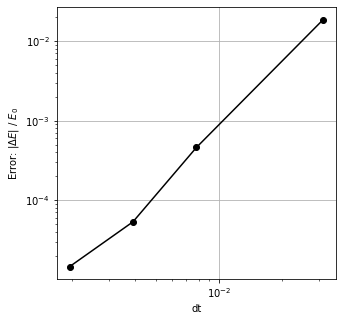

In [6]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
err = np.abs((ldata[0] - ldata[1]) / ldata[0])
ax.plot(ldata[2],err,color='black')
ax.scatter(ldata[2],err,color='black')
#ax.set_ylim(0,0.6)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Error: $|\Delta E|$ / $E_0$')

ax.grid();
ax.set_xlabel('dt');


(-0.5418764195112501, -0.53792031621175)


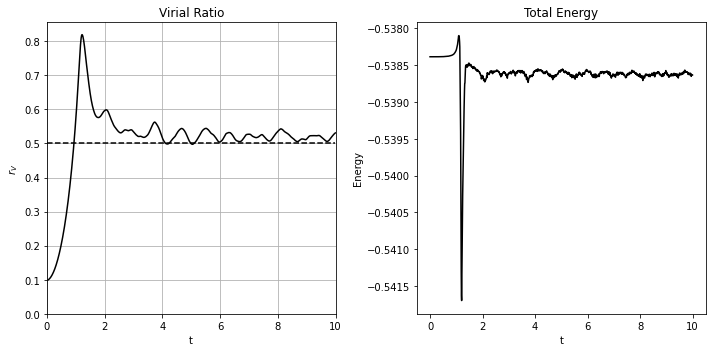

In [18]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

x = np.arange(0,len(energy[1]),1) * ldata[2,1]
ax[0].plot(x,energy[1],color='black')
ax[0].set_xlabel('t')
ax[0].set_ylabel('$r_V$');
ax[0].hlines(0.5,x[0],x[-1],linestyle='dashed',color='black')
ax[0].grid();
ax[0].set_xlim(0,10)
ax[0].set_ylim(0,ax[0].get_ylim()[1])
ax[0].set_title('Virial Ratio')

ax[1].plot(x,energy[0],color='black')
ax[1].set_xlabel('t')
ax[1].set_ylabel('Energy');
ax[1].set_title('Total Energy')
print(ax[1].get_ylim())
fig.tight_layout();

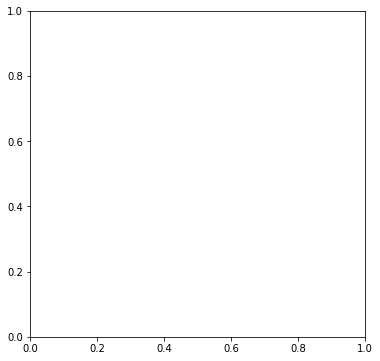

In [61]:
from matplotlib.animation import FFMpegWriter

metadata = dict(title='Cold Collapse', artist='Max',comment='noncollisional')
writer = FFMpegWriter(fps=120, metadata=metadata,bitrate=200000)

plt.rcParams['animation.ffmpeg_path']=r'C:\FFmpeg\bin\ffmpeg.exe'
lines = []

fig, ax = plt.subplots(1,1,figsize=(6,6))


with writer.saving(fig,'Cold Collapse dt9.mp4',dpi=200):
    for i in range(fdata.shape[0]):
        
        ax.scatter(fdata[i,:,0],fdata[i,:,1],s=0.5, color='black');
        ax.set_title('Final State X-Y Plane Projection')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.contour(cx, cy,(cx**2 + cy**2), [1], colors='red');
        ax.set_xlim(-1,1)
        ax.set_ylim(-1,1)
        writer.grab_frame()
        
        j = 0
        while j < len(ax.lines): #gross but works ig
            ax.lines.pop(j)
        lines.clear()
        ax.clear();
        
        
        print('Frame: {} of {} \r'.format(i,fdata.shape[0]),end='')

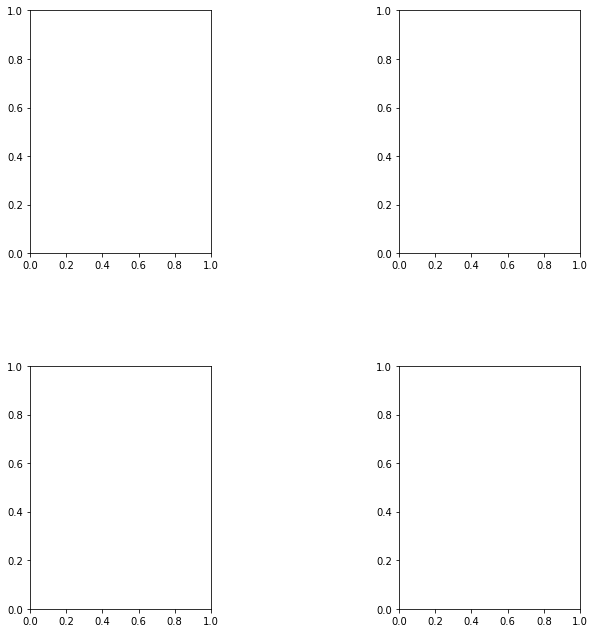

In [87]:
from matplotlib.animation import FFMpegWriter

metadata = dict(title='Cold Collapse', artist='Max',comment='noncollisional')
writer = FFMpegWriter(fps=60, metadata=metadata,bitrate=200000)

plt.rcParams['animation.ffmpeg_path']=r'C:\FFmpeg\bin\ffmpeg.exe'

nr = []


fig, ax = plt.subplots(2,2,figsize=(10,10))

with writer.saving(fig,'Cold Collapse dt7 Full Evolution.mp4',dpi=200):
    for i in range(fdata.shape[0]):
        print('Frame: {} of {} \r'.format(i+1,fdata.shape[0]),end='')

        ax[0,0].scatter(fdata[i,:,0],fdata[i,:,1],s=0.5, color='black');
        ax[0,0].set_title('Final State X-Y Plane Projection')
        ax[0,0].set_xlabel('X')
        ax[0,0].set_ylabel('Y')
        ax[0,0].contour(cx, cy,(cx**2 + cy**2), [1], colors='red');
        ax[0,0].set_xlim(-1,1)
        ax[0,0].set_ylim(-1,1)

        r = np.sqrt(((fdata[i,:,:3]**2)).sum(axis=1))
        r = r[r.argsort()]
        nr.clear()
        xv = np.linspace(0,1,1000)
        for val in xv:
            nr.append( (r < val).sum() )


        ax[0,1].plot(xv,nr,color='orange',label='Points Contained Within Radius')
        ax[0,1].set_title('Radial Number Density')
        ax[0,1].set_yscale('log')
        ax[0,1].set_xscale('log')
        ax[0,1].set_ylim(1,1024)
        ax[0,1].set_xlim(0.05,1)
        ax[0,1].set_xlabel('r')
        ax[0,1].set_ylabel('$n_r$')

        xp = np.arange(0,len(energy[1]),1) * ldata[2,1]
        ax[1,0].plot(xp[:i+1],energy[1][:i+1],color='black')
        ax[1,0].set_xlabel('t')
        ax[1,0].set_ylabel('$r_V$');
        ax[1,0].hlines(0.5,xp[0],xp[-1],linestyle='dashed',color='black')
        ax[1,0].grid();
        ax[1,0].set_xlim(0,10)
        ax[1,0].set_ylim(0,0.855)
        ax[1,0].set_title('Virial Ratio')

        ax[1,1].plot(xp[:i+1],energy[0][:i+1],color='black')
        ax[1,1].set_xlabel('t')
        ax[1,1].set_ylabel('Energy');
        ax[1,1].set_title('Total Energy')
        ax[1,1].set_xlim(0,10)
        ax[1,1].set_ylim(-0.542, -0.538)

        fig.tight_layout()
        writer.grab_frame()
        
        ax[0,0].cla()
        ax[0,1].cla()
        ax[1,0].cla()
        ax[1,1].cla()            